# 실습
브라우저 열기
접속 주소 : url_ex = 'https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=1'



In [2]:
!pip install selenium
!pip install chromedriver-autoinstaller

In [3]:
import chromedriver_autoinstaller
from selenium import webdriver
from bs4 import BeautifulSoup #html에서 원하는 내용을 찾아주는 라이브러리

chromedriver_autoinstaller.install() # chromedriver 최신버전설치 - 무조건 먼저 해주자
browser = webdriver.Chrome()    # 브라우저 열기

In [4]:
url_ex = 'https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=1'
browser.get(url_ex) #해당 url 열기 - 브라우저 안열고 실행하면 오류남

In [5]:
# 정보 저장
soup = BeautifulSoup(browser.page_source, "html.parser") 

In [6]:
channel_list = soup.select('form > table > tbody > tr')
len(channel_list) # 채널 리스트


100

In [7]:
channel_list

[<tr class="aos-init aos-animate" data-aos="fade-up" data-aos-duration="800">
 <td class="rank">
                         1                    </td>
 <td class="td_img">
 <div class="info_img"><a href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;wr_id=3203&amp;page=1"><img class="lazyload" data-src="https://yt3.ggpht.com/ytc/AKedOLReDErFqqi70z9AXcMzf9Hho9OU1dSciqFYDoGJPQ=s88-c-k-c0x00ffffff-no-rj-mo" height="88" src="https://yt3.ggpht.com/ytc/AKedOLReDErFqqi70z9AXcMzf9Hho9OU1dSciqFYDoGJPQ=s88-c-k-c0x00ffffff-no-rj-mo" width="88"/></a></div>
 <p class="info_rank">1</p>
 </td>
 <td class="subject">
 <h1>
 <p <a="" class="category" href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;sca=%EC%9D%8C%EC%95%85%2F%EB%8C%84%EC%8A%A4%2F%EA%B0%80%EC%88%98">[음악/댄스/가수]
                                 
                                 </p>
 <a href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;wr_id=3203&amp;page=1">
 								
 								B

In [8]:
channel_list[0].text

'\n\n                        1                    \n\n\n1\n\n\n\n[음악/댄스/가수]\n                                \n                                \n\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\tBLACKPINK\t\t\t\t\t\t\t\n\n\n\t\t\t\t\t\t\t\t1\t\t\t\t\t\t\t\n \n"YG Entertainment" YG 와이지 K-pop BLACKPINK 블랙핑크 블핑 제니 로제 리사 지수 Lisa Jisoo Jennie ...\n\n\n                            7360만233억4198만                            \n                            394                            \n                            20,070                        \n\n7360만\n233억4198만\n394개\n\n20,070\nHIT\n\n'

In [9]:
#반환 값 타입 확인
type(channel_list[0].text)

str

원하는 위치가 범위일 경우, 아랫것 태그를 찾고 html에서 눈으로 보면서 범위가 나올때 까지 올라가자
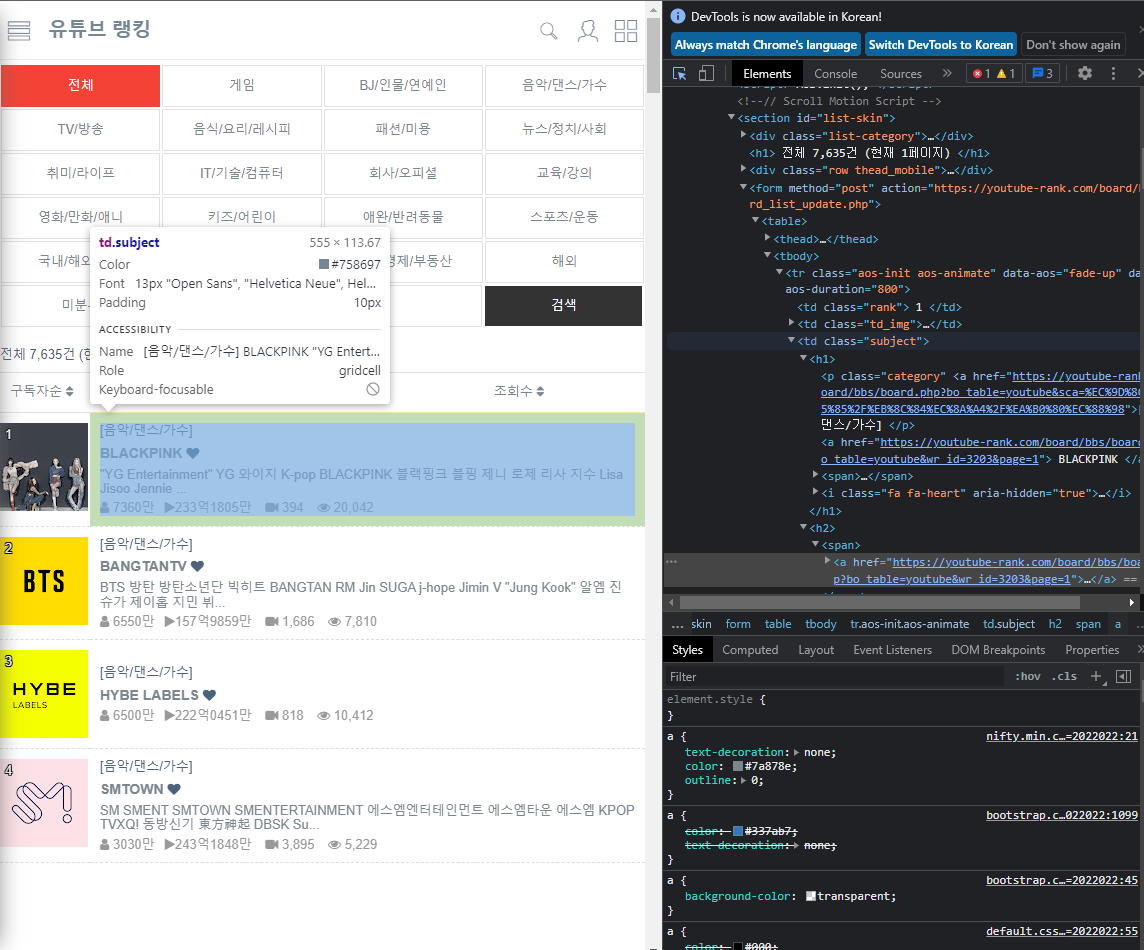

In [10]:
# 클래스 속성 값이 aos-init이거나, aos-animate인 경우 찾기
len(soup.select('tr.aos-init.aos-animate')) 

5

In [11]:
#channel 변수 설정
channel = channel_list[0]

In [12]:
channel.select('h1 > a')

[<a href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;wr_id=3203&amp;page=1">
 								
 								BLACKPINK							</a>]

#### a href가 뭐지?
a 태그에 달려있는 링크 값 - a태그에 달린 버튼과 연동된 링크 주소 = href

In [13]:
# 리스트 내 첫번째 원소에 text만 가져오자
channel.select('h1 > a')[0].text

'\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\tBLACKPINK\t\t\t\t\t\t\t'

In [14]:
#strip() 함수로 공백 등 지우기
channel.select('h1 > a')[0].text.strip()

'BLACKPINK'

***
## 실습 2

In [15]:
channel

<tr class="aos-init aos-animate" data-aos="fade-up" data-aos-duration="800">
<td class="rank">
                        1                    </td>
<td class="td_img">
<div class="info_img"><a href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;wr_id=3203&amp;page=1"><img class="lazyload" data-src="https://yt3.ggpht.com/ytc/AKedOLReDErFqqi70z9AXcMzf9Hho9OU1dSciqFYDoGJPQ=s88-c-k-c0x00ffffff-no-rj-mo" height="88" src="https://yt3.ggpht.com/ytc/AKedOLReDErFqqi70z9AXcMzf9Hho9OU1dSciqFYDoGJPQ=s88-c-k-c0x00ffffff-no-rj-mo" width="88"/></a></div>
<p class="info_rank">1</p>
</td>
<td class="subject">
<h1>
<p <a="" class="category" href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;sca=%EC%9D%8C%EC%95%85%2F%EB%8C%84%EC%8A%A4%2F%EA%B0%80%EC%88%98">[음악/댄스/가수]
                                
                                </p>
<a href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;wr_id=3203&amp;page=1">
								
								BLACKPINK							

In [16]:
# category
channel.select('p.category')[0].text.strip()

'[음악/댄스/가수]'

In [17]:
#구독자수
channel.select('td.subscriber_cnt')[0].text.strip()

'7360만'

In [18]:
channel.select('td.view_cnt')[0].text

'233억4198만'

In [19]:
channel.select('td.video_cnt')[0].text

'394개'

In [20]:
# 1~2 page의 내용 for문으로 크롤링하기
import time
result = []
for page in range(1,3):
    url = f'https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page={page}'
    browser.get(url)
    time.sleep(1) # selenium이 정보를 받는데 느려서, 시간 딜레이를 줘야 정보를 읽을 수 있음
    soup = BeautifulSoup(browser.page_source, 'html.parser')
    channel_list = soup.select('form > table > tbody > tr')
    for channel in channel_list:
        name = channel.select('h1 > a')[0].text.strip()
        sub = channel.select('td.subscriber_cnt')[0].text.strip()
        view = channel.select('td.view_cnt')[0].text
        video = channel.select('td.video_cnt')[0].text
        #print(name,sub,view,video)
        data = [name,sub,view,video] # 로우 한줄이 됨
        result.append(data) #result 리스트에 만들자

In [21]:
# pandas 만들기
import pandas as pd

df = pd.DataFrame(result)

df

col_list = ['channel name', 'subscriber', 'view', 'video']
df.columns = col_list
df

,channel name,subscriber,view,video
0,BLACKPINK,7360만,233억4198만,394개
1,BANGTANTV,6550만,158억1764만,"1,686개"
2,HYBE LABELS,6500만,222억1683만,819개
3,SMTOWN,3030만,243억2542만,"3,895개"
4,Boram Tube Vlog [보람튜브 브이로그],2650만,110억5288만,223개
...,...,...,...,...
195,official IZ*ONE,221만,6억3321만,270개
196,해그린달 haegreendal,220만,9378만,62개
197,채널 NCT DANCE,219만,2억0295만,42개
198,[wonderkids TV] 원더키즈 TV,218만,9억8896만,967개
